<a href="https://colab.research.google.com/github/aakarshhh/AI_ML/blob/main/Model_Update_StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install yfinance 

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=abc77a835c3104f02e227e88d2421e685310a28f358ac7b9fb89ad31fc1d06d3
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as dr
import datetime as dt 
import yfinance as yf
import tensorflow as tf
import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import  Dense , Dropout ,LSTM ,BatchNormalization

In [4]:
pred_days = 8
d= dt.timedelta(days = 21)
start = dt.datetime.now()- d 
end = dt.datetime.now()
start, end
company=''
for i in pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0] :
  company+=str(i).strip()+' '
data = yf.download(
        tickers = f'{company}',
        start =start, end=end,
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True)
data = pd.DataFrame(data)
data = data[-(pred_days+1):]
param = pd.read_csv('/content/drive/MyDrive/SentStock/param.csv',header=0).rename(index={0:'mean',1:'std',2:'pred', 3:'real',4:'pred_next'})

[*********************100%***********************]  69 of 69 completed


In [5]:
pred_days = 8
d= dt.timedelta(days = 21)
start = dt.datetime.now()- d 
end = dt.datetime.now()
start, end
company=''
for i in pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0] :
  company+=str(i).strip()+' '
data = yf.download(
        tickers = f'{company}',
        start =start, end=end,
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True)
data = pd.DataFrame(data)
data = data[-(pred_days+1):]
param = pd.read_csv('/content/drive/MyDrive/SentStock/param.csv',header=0).rename(index={0:'mean',1:'std',2:'pred', 3:'real',4:'pred_next'})

[*********************100%***********************]  69 of 69 completed


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
model= Sequential()
model.add(Dense(16, activation='relu',input_shape= ( pred_days , 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(LSTM( units = 16 , return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(units = 64 ,return_sequences=True , recurrent_dropout=0.2))
model.add(LSTM(units = 32  , recurrent_dropout=0.15))
model.add(Dense(8, activation='relu'))
model.add(Dense(units = 1))
model.compile(loss = 'mse' , optimizer = 'adam' )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8, 16)             32        
_________________________________________________________________
dense_1 (Dense)              (None, 8, 32)             544       
_________________________________________________________________
dense_2 (Dense)              (None, 8, 16)             528       
_________________________________________________________________
lstm (LSTM)                  (None, 8, 16)             2112      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 64)             20736     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2

In [9]:
import IPython
#keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
#IPython.display.Image('test_keras_plot_model.png')

In [10]:
model.load_weights('/content/drive/MyDrive/SentStock/stock_lstm.keras')

In [11]:
sc = StandardScaler()
from numpy import arange
def train_model(x,y,ep = 7):
  model.fit(x,y, epochs=ep , batch_size = 1 , verbose=2 )

def norm(x , c ):
  sc.mean_= param[f'{c}']['mean']
  sc.scale_= param[f'{c}']['std']
  return sc.transform(x)

def scaled(y , c ):
  sc.mean_= param[f'{c}']['mean']
  sc.scale_= param[f'{c}']['std']
  return sc.inverse_transform(y)
def save_plot(d,c,name = "default"):
  d = d[3:]
  x=np.linspace(1.0, 12.0, num =30) 
  plt.figure(dpi=100)
  plt.plot(d, color="green",label = "Predicted Data")
  plt.plot(d[:6],color="black",label = "Actual Data")
  plt.legend()
  x=[i for i in range(0,15)]
  for i,j in zip(x[5:],d[5:]):
    if i % 2:
      plt.annotate(str(round(j[0],3)),xy=(i,j+.2*param[f'{c}']['std']))        
    else:
      plt.annotate(str(round(j[0],3)),xy=(i,j-.2*param[f'{c}']['std']))
  plt.savefig(fname = f'/content/drive/MyDrive/SentStock/Pred/{name}_'+end.strftime("%m_%d_%Y")+'.jpeg')
  plt.show()

In [12]:
param 

,T,USM,VZ,AAPL,MSFT,AMZN,GOOGL,FB,V,NVDA,MA,PYPL,NFLX,BRK-B,JPM,BAC,WFC,MS,C,BLK,AMT,PLD,CCI,EQIX,PSA,WELL,SBAC,XOM,CVX,NEP,SO,D,DUK,COP,AEP,KMI,EXC,CVS,UNH,MCK,ABC,CI,CAH,ANTM,JNJ,CNC,HUM,THO,PATK,LCII,SHW,LEA,CLX,DIS,CMCSA,NKE,CHTR,ATVI,MAR,LVS,VIAC,BTI,MO,EL,BUD,PM,PEP,KO,PG
mean,28.203334,36.825555,56.112222,145.918886,279.806671,3634.415554,2534.186686,345.973338,243.124446,193.981389,380.028890,298.994446,534.682224,278.352220,153.494446,38.802222,44.357777,92.220000,67.671111,885.257779,280.692223,126.724445,202.086667,828.552219,311.677778,87.538888,332.119995,58.683333,100.720000,74.810001,62.315556,75.598890,102.878889,57.203334,85.902222,17.933334,45.451111,81.837778,415.316667,190.724447,114.644444,233.740002,57.187777,391.725555,168.912223,73.162223,461.902218,109.074445,73.774443,134.855555,279.633328,168.815555,181.898892,179.837775,57.655556,160.686668,714.656657,91.813334,138.115557,49.417778,41.535556,38.395556,47.268890,322.181108,68.584444,98.092222,153.824446,55.685555,138.679999
std,0.250333,0.476868,0.287354,1.895095,1.865951,62.751976,20.949812,5.132994,3.656222,7.678893,8.154607,2.908616,9.251001,2.293619,3.273356,1.136934,0.836896,1.706790,1.262426,19.806695,1.478643,0.797469,0.912237,5.534939,2.054237,1.406369,2.081056,2.095530,3.009851,0.887708,0.645706,0.739121,1.295372,2.193753,0.857357,0.457967,0.442630,0.629440,3.468224,2.916933,1.767227,2.443657,0.667112,5.008500,1.003147,1.085794,4.338215,2.692097,1.622743,2.934102,2.368322,3.683430,2.966435,3.949174,0.477309,1.230086,9.729713,0.938391,3.551086,1.391217,1.160499,0.588635,0.262867,3.504050,1.180744,1.444959,2.464219,0.787261,1.353005
pred,27.924423,37.115879,55.839024,145.455612,281.059113,3591.241943,2550.645264,346.202393,244.008545,193.507324,379.407135,301.352478,515.084106,278.780762,153.602356,38.542892,45.990494,95.337875,67.753975,884.916687,280.320160,126.785576,201.118729,820.123413,308.089752,87.365356,332.255829,58.151936,99.616280,75.858604,63.043076,74.904640,102.972733,55.852051,84.827972,17.834909,45.788956,82.855408,415.074738,196.899719,118.285202,233.201904,58.700169,384.594879,169.310562,72.758339,463.795593,113.468727,77.199387,141.023285,281.889709,169.035126,178.789307,177.408997,57.698555,160.986084,718.384521,91.358543,138.833969,49.288250,41.489162,37.868179,47.317383,322.642548,68.425545,96.245560,155.171158,56.571835,139.331711
real,27.900000,37.139999,55.950001,145.399994,281.399994,3585.199951,2550.979980,346.230011,243.660004,194.100006,380.059998,301.769989,513.630005,279.880005,152.860001,38.459999,45.799999,95.680000,67.889999,882.679993,280.260010,126.900002,201.100006,819.760010,308.290009,87.989998,331.959991,57.759998,99.820000,75.510002,62.820000,74.720001,103.160004,57.020000,84.720001,17.850000,45.840000,83.059998,414.640015,197.539993,118.220001,233.570007,58.599998,383.589996,169.490005,72.910004,463.480011,113.000000,77.400002,141.059998,281.829987,169.710007,178.839996,176.889999,57.810001,161.080002,718.419983,91.169998,140.360001,49.419998,41.299999,37.880001,47.330002,323.079987,68.400002,96.540001,155.240005,56.549999,139.199997
pred_next,28.316603,37.519194,56.118136,144.635542,277.841614,3688.310250,2512.901464,349.885645,239.267613,200.780935,374.805081,300.779438,526.997406,281.838003,156.496355,39.862718,44.285719,89.795175,68.465865,897.596519,278.518536,125.427253,201.209724,819.779538,309.921462,86.291725,329.084377,61.544056,104.467110,75.925229,62.154503,75.360993,100.886107,58.391529,85.082026,18.421318,44.940376,81.449881,413.732829,190.319280,115.520603,234.787483,57.401546,387.242403,170.063096,73.089147,456.912751,111.732870,73.790073,134.884231,276.895693,174.668611,179.789350,177.230305,58.054434,161.019523,735.502188,91.873967,142.150281,51.047415,42.344907,38.711684,47.359614,317.457544,69.627671,99.237723,150.411276,54.685224,137.448187


In [13]:
param = param[pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0]]

In [14]:
param.shape

(5, 69)

In [15]:
a = param
a=pd.concat((a ,param.loc[['real','pred','pred_next']]))
a.reset_index(drop=True, inplace=True)
a= a.rename(index={0:'real',1:'pred',2:'pred_next', 3:'pred_next2',4:'pred_next3',5:'pred_next4',6:'pred_next5',7:'pred_next6'})

Training started for T
Epoch 1/7
1/1 - 5s - loss: 0.6852
Epoch 2/7
1/1 - 0s - loss: 0.0659
Epoch 3/7
1/1 - 0s - loss: 0.1292
Epoch 4/7
1/1 - 0s - loss: 0.2340
Epoch 5/7
1/1 - 0s - loss: 0.3578
Epoch 6/7
1/1 - 0s - loss: 0.0376
Epoch 7/7
1/1 - 0s - loss: 0.0995
((1, 8, 1), (1, 1, 1), 'T')


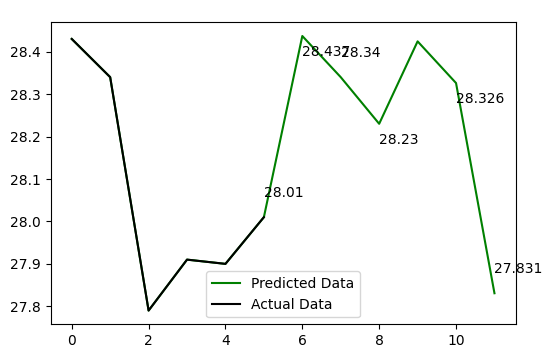

Training ended for T
1

Training started for USM
Epoch 1/7
1/1 - 0s - loss: 0.0054
Epoch 2/7
1/1 - 0s - loss: 6.0551e-04
Epoch 3/7
1/1 - 0s - loss: 1.5836e-06
Epoch 4/7
1/1 - 0s - loss: 9.8709e-04
Epoch 5/7
1/1 - 0s - loss: 0.0026
Epoch 6/7
1/1 - 0s - loss: 0.0102
Epoch 7/7
1/1 - 0s - loss: 0.0056
((1, 8, 1), (1, 1, 1), 'USM')


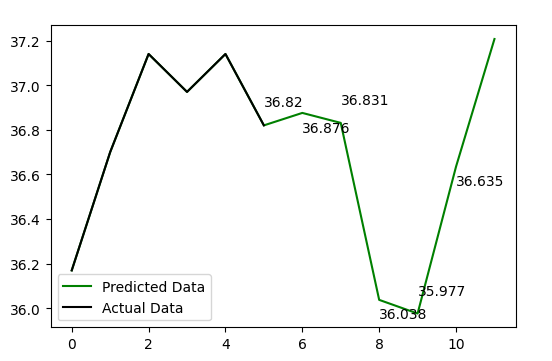

Training ended for USM
2

Training started for VZ
Epoch 1/7
1/1 - 0s - loss: 0.0128
Epoch 2/7
1/1 - 0s - loss: 0.0505
Epoch 3/7
1/1 - 0s - loss: 0.0138
Epoch 4/7
1/1 - 0s - loss: 0.0640
Epoch 5/7
1/1 - 0s - loss: 0.1235
Epoch 6/7
1/1 - 0s - loss: 0.0239
Epoch 7/7
1/1 - 0s - loss: 0.0698
((1, 8, 1), (1, 1, 1), 'VZ')


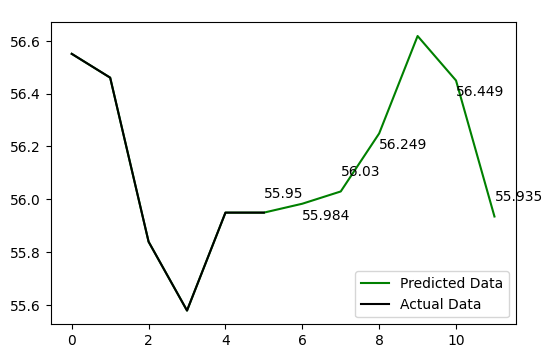

Training ended for VZ
3

Training started for AAPL
Epoch 1/7
1/1 - 0s - loss: 0.4663
Epoch 2/7
1/1 - 0s - loss: 0.4358
Epoch 3/7
1/1 - 0s - loss: 0.4204
Epoch 4/7
1/1 - 0s - loss: 0.2061
Epoch 5/7
1/1 - 0s - loss: 0.2136
Epoch 6/7
1/1 - 0s - loss: 0.2445
Epoch 7/7
1/1 - 0s - loss: 0.1918
((1, 8, 1), (1, 1, 1), 'AAPL')


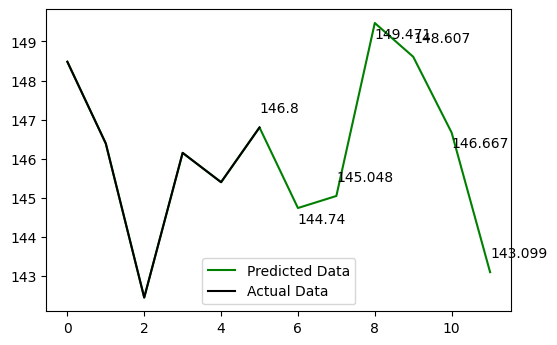

Training ended for AAPL
4

Training started for MSFT
Epoch 1/7
1/1 - 0s - loss: 0.0016
Epoch 2/7
1/1 - 0s - loss: 0.0030
Epoch 3/7
1/1 - 0s - loss: 4.8746e-04
Epoch 4/7
1/1 - 0s - loss: 0.0103
Epoch 5/7
1/1 - 0s - loss: 0.0028
Epoch 6/7
1/1 - 0s - loss: 0.0019
Epoch 7/7
1/1 - 0s - loss: 0.0113
((1, 8, 1), (1, 1, 1), 'MSFT')


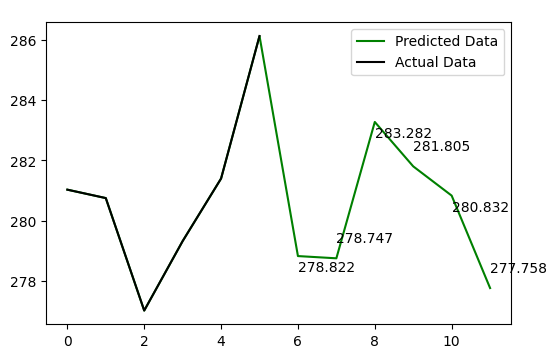

Training ended for MSFT
5

Training started for AMZN
Epoch 1/7
1/1 - 0s - loss: 0.0706
Epoch 2/7
1/1 - 0s - loss: 0.0052
Epoch 3/7
1/1 - 0s - loss: 1.0091e-04
Epoch 4/7
1/1 - 0s - loss: 0.0045
Epoch 5/7
1/1 - 0s - loss: 4.5185e-05
Epoch 6/7
1/1 - 0s - loss: 0.0174
Epoch 7/7
1/1 - 0s - loss: 6.3280e-06
((1, 8, 1), (1, 1, 1), 'AMZN')


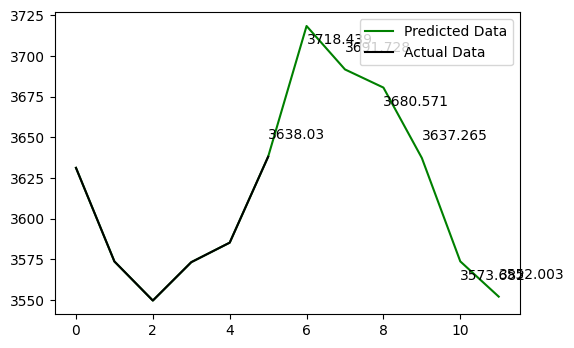

Training ended for AMZN
6

Training started for GOOGL
Epoch 1/7
1/1 - 0s - loss: 0.0248
Epoch 2/7
1/1 - 0s - loss: 0.0055
Epoch 3/7
1/1 - 0s - loss: 0.0187
Epoch 4/7
1/1 - 0s - loss: 0.0367
Epoch 5/7
1/1 - 0s - loss: 0.0241
Epoch 6/7
1/1 - 0s - loss: 0.0156
Epoch 7/7
1/1 - 0s - loss: 0.0274
((1, 8, 1), (1, 1, 1), 'GOOGL')


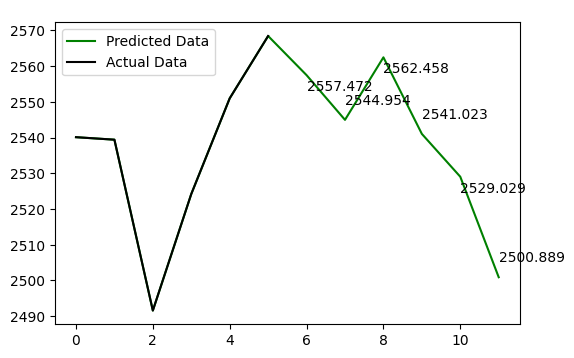

Training ended for GOOGL
7

Training started for FB
Epoch 1/7
1/1 - 0s - loss: 0.0233
Epoch 2/7
1/1 - 0s - loss: 2.5420e-04
Epoch 3/7
1/1 - 0s - loss: 0.0167
Epoch 4/7
1/1 - 0s - loss: 0.0016
Epoch 5/7
1/1 - 0s - loss: 4.7272e-04
Epoch 6/7
1/1 - 0s - loss: 0.0106
Epoch 7/7
1/1 - 0s - loss: 0.0329
((1, 8, 1), (1, 1, 1), 'FB')


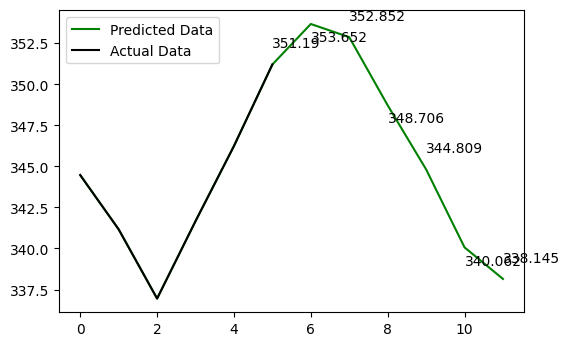

Training ended for FB
8

Training started for V
Epoch 1/7
1/1 - 0s - loss: 0.0693
Epoch 2/7
1/1 - 0s - loss: 0.1608
Epoch 3/7
1/1 - 0s - loss: 0.1255
Epoch 4/7
1/1 - 0s - loss: 0.0919
Epoch 5/7
1/1 - 0s - loss: 0.0145
Epoch 6/7
1/1 - 0s - loss: 0.0525
Epoch 7/7
1/1 - 0s - loss: 0.0018
((1, 8, 1), (1, 1, 1), 'V')


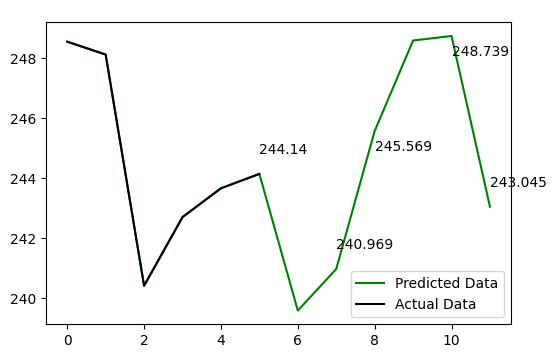

Training ended for V
9

Training started for NVDA
Epoch 1/7
1/1 - 0s - loss: 0.0528
Epoch 2/7
1/1 - 0s - loss: 0.0110
Epoch 3/7
1/1 - 0s - loss: 0.0136
Epoch 4/7
1/1 - 0s - loss: 0.0323
Epoch 5/7
1/1 - 0s - loss: 0.0057
Epoch 6/7
1/1 - 0s - loss: 3.1403e-04
Epoch 7/7
1/1 - 0s - loss: 0.0459
((1, 8, 1), (1, 1, 1), 'NVDA')


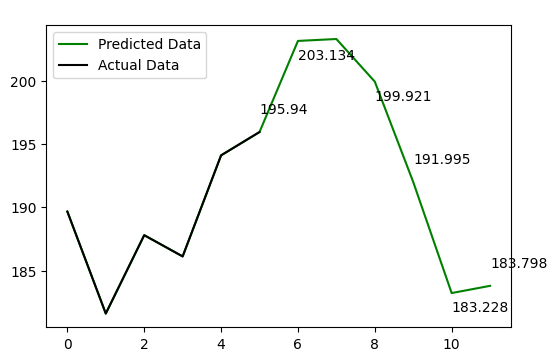

Training ended for NVDA
10

Training started for MA
Epoch 1/7
1/1 - 0s - loss: 0.0278
Epoch 2/7
1/1 - 0s - loss: 0.1973
Epoch 3/7
1/1 - 0s - loss: 0.0085
Epoch 4/7
1/1 - 0s - loss: 0.0260
Epoch 5/7
1/1 - 0s - loss: 0.0060
Epoch 6/7
1/1 - 0s - loss: 0.0016
Epoch 7/7
1/1 - 0s - loss: 0.0412
((1, 8, 1), (1, 1, 1), 'MA')


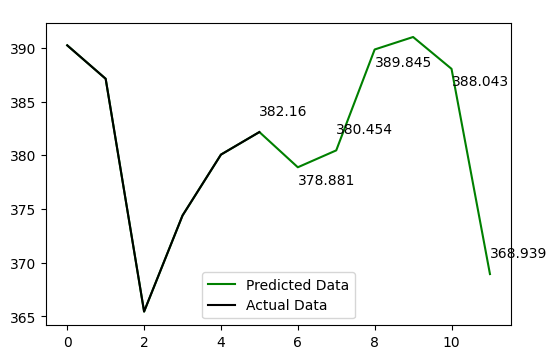

Training ended for MA
11

Training started for PYPL
Epoch 1/7
1/1 - 0s - loss: 0.1519
Epoch 2/7
1/1 - 0s - loss: 0.1211
Epoch 3/7
1/1 - 0s - loss: 0.0711
Epoch 4/7
1/1 - 0s - loss: 0.1357
Epoch 5/7
1/1 - 0s - loss: 0.1151
Epoch 6/7
1/1 - 0s - loss: 0.0683
Epoch 7/7
1/1 - 0s - loss: 0.0284
((1, 8, 1), (1, 1, 1), 'PYPL')


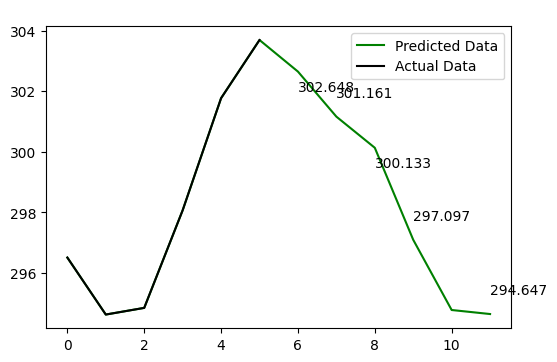

Training ended for PYPL
12

Training started for NFLX
Epoch 1/7
1/1 - 0s - loss: 0.0342
Epoch 2/7
1/1 - 0s - loss: 0.2410
Epoch 3/7
1/1 - 0s - loss: 0.1720
Epoch 4/7
1/1 - 0s - loss: 0.0762
Epoch 5/7
1/1 - 0s - loss: 0.0640
Epoch 6/7
1/1 - 0s - loss: 0.0617
Epoch 7/7
1/1 - 0s - loss: 0.0973
((1, 8, 1), (1, 1, 1), 'NFLX')


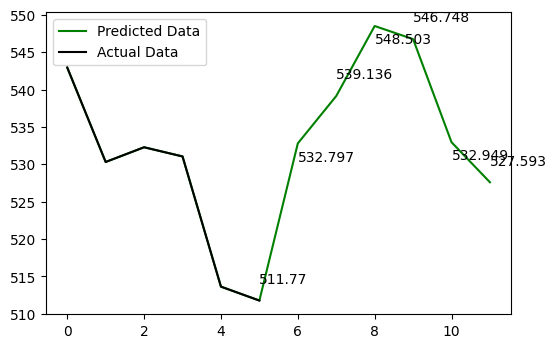

Training ended for NFLX
13

Training started for BRK-B
Epoch 1/7
1/1 - 0s - loss: 0.0199
Epoch 2/7
1/1 - 0s - loss: 0.0257
Epoch 3/7
1/1 - 0s - loss: 0.0132
Epoch 4/7
1/1 - 0s - loss: 3.2746e-06
Epoch 5/7
1/1 - 0s - loss: 0.0058
Epoch 6/7
1/1 - 0s - loss: 0.0299
Epoch 7/7
1/1 - 0s - loss: 0.0035
((1, 8, 1), (1, 1, 1), 'BRK-B')


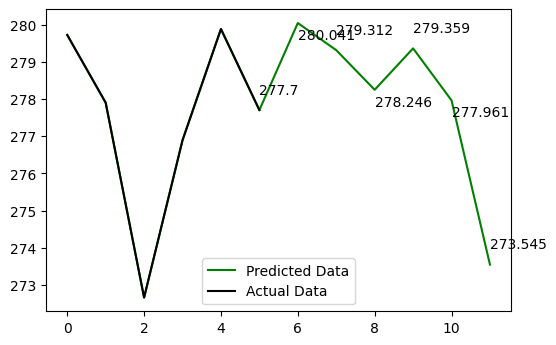

Training ended for BRK-B
14

Training started for JPM
Epoch 1/7
1/1 - 0s - loss: 5.3989e-04
Epoch 2/7
1/1 - 0s - loss: 0.0180
Epoch 3/7
1/1 - 0s - loss: 0.0075
Epoch 4/7
1/1 - 0s - loss: 0.0590
Epoch 5/7
1/1 - 0s - loss: 0.0520
Epoch 6/7
1/1 - 0s - loss: 0.0489
Epoch 7/7
1/1 - 0s - loss: 0.0019
((1, 8, 1), (1, 1, 1), 'JPM')


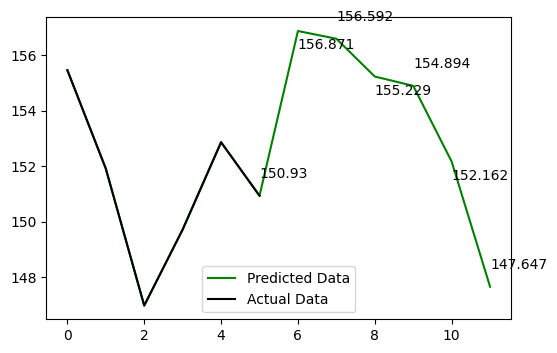

Training ended for JPM
15

Training started for BAC
Epoch 1/7
1/1 - 0s - loss: 0.0582
Epoch 2/7
1/1 - 0s - loss: 5.9356e-04
Epoch 3/7
1/1 - 0s - loss: 0.0098
Epoch 4/7
1/1 - 0s - loss: 0.0189
Epoch 5/7
1/1 - 0s - loss: 0.0018
Epoch 6/7
1/1 - 0s - loss: 0.0025
Epoch 7/7
1/1 - 0s - loss: 4.4073e-04
((1, 8, 1), (1, 1, 1), 'BAC')


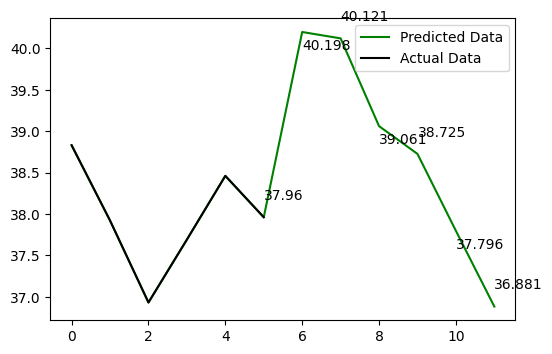

Training ended for BAC
16

Training started for WFC
Epoch 1/7
1/1 - 0s - loss: 5.6689e-05
Epoch 2/7
1/1 - 0s - loss: 0.0047
Epoch 3/7
1/1 - 0s - loss: 0.0025
Epoch 4/7
1/1 - 0s - loss: 0.0012
Epoch 5/7
1/1 - 0s - loss: 4.8196e-06
Epoch 6/7
1/1 - 0s - loss: 0.0014
Epoch 7/7
1/1 - 0s - loss: 1.3805e-05
((1, 8, 1), (1, 1, 1), 'WFC')


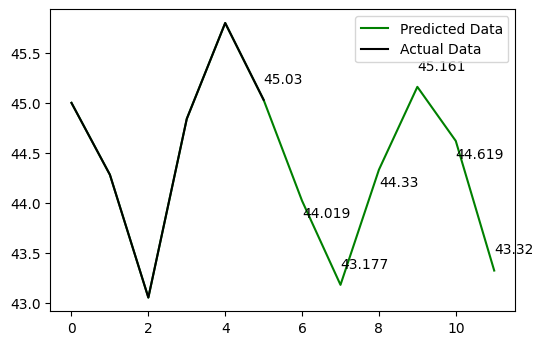

Training ended for WFC
17

Training started for MS
Epoch 1/7
1/1 - 0s - loss: 0.0154
Epoch 2/7
1/1 - 0s - loss: 0.0220
Epoch 3/7
1/1 - 0s - loss: 0.0141
Epoch 4/7
1/1 - 0s - loss: 0.0343
Epoch 5/7
1/1 - 0s - loss: 0.0193
Epoch 6/7
1/1 - 0s - loss: 0.0204
Epoch 7/7
1/1 - 0s - loss: 0.0219
((1, 8, 1), (1, 1, 1), 'MS')


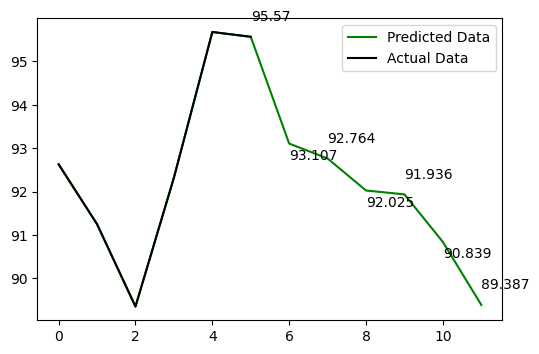

Training ended for MS
18

Training started for C
Epoch 1/7
1/1 - 0s - loss: 0.0632
Epoch 2/7
1/1 - 0s - loss: 0.0046
Epoch 3/7
1/1 - 0s - loss: 0.0195
Epoch 4/7
1/1 - 0s - loss: 0.0358
Epoch 5/7
1/1 - 0s - loss: 0.0089
Epoch 6/7
1/1 - 0s - loss: 0.0203
Epoch 7/7
1/1 - 0s - loss: 0.0044
((1, 8, 1), (1, 1, 1), 'C')


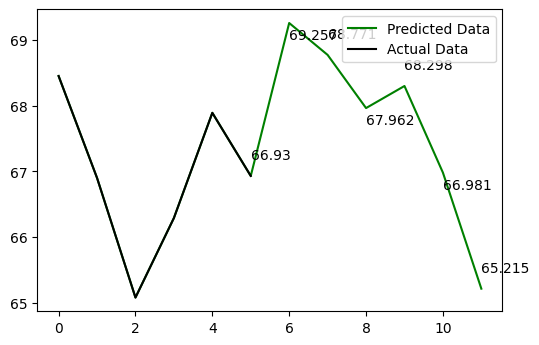

Training ended for C
19

Training started for BLK
Epoch 1/7
1/1 - 0s - loss: 1.0823e-04
Epoch 2/7
1/1 - 0s - loss: 0.0102
Epoch 3/7
1/1 - 0s - loss: 0.0014
Epoch 4/7
1/1 - 0s - loss: 0.0053
Epoch 5/7
1/1 - 0s - loss: 7.6918e-08
Epoch 6/7
1/1 - 0s - loss: 0.0181
Epoch 7/7
1/1 - 0s - loss: 0.0028
((1, 8, 1), (1, 1, 1), 'BLK')


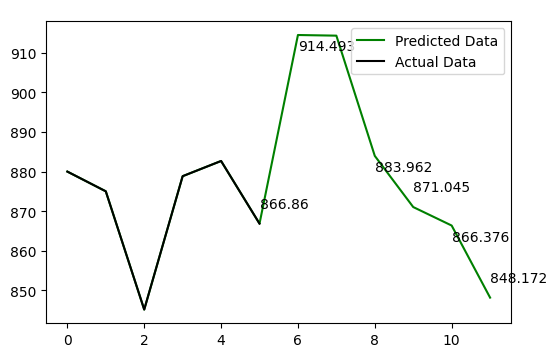

Training ended for BLK
20

Training started for AMT
Epoch 1/7
1/1 - 0s - loss: 0.1166
Epoch 2/7
1/1 - 0s - loss: 0.3335
Epoch 3/7
1/1 - 0s - loss: 0.0885
Epoch 4/7
1/1 - 0s - loss: 0.1557
Epoch 5/7
1/1 - 0s - loss: 0.1030
Epoch 6/7
1/1 - 0s - loss: 0.0011
Epoch 7/7
1/1 - 0s - loss: 0.0088
((1, 8, 1), (1, 1, 1), 'AMT')


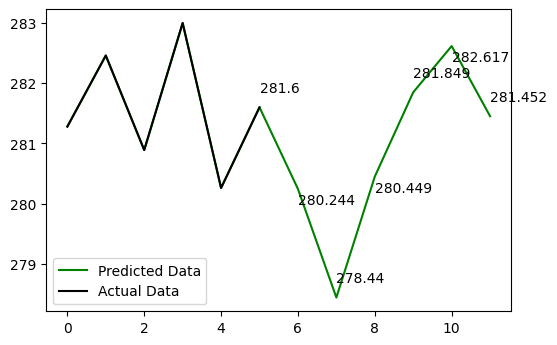

Training ended for AMT
21

Training started for PLD
Epoch 1/7
1/1 - 0s - loss: 0.1614
Epoch 2/7
1/1 - 0s - loss: 0.0965
Epoch 3/7
1/1 - 0s - loss: 0.0234
Epoch 4/7
1/1 - 0s - loss: 0.1021
Epoch 5/7
1/1 - 0s - loss: 0.2069
Epoch 6/7
1/1 - 0s - loss: 0.0901
Epoch 7/7
1/1 - 0s - loss: 0.0643
((1, 8, 1), (1, 1, 1), 'PLD')


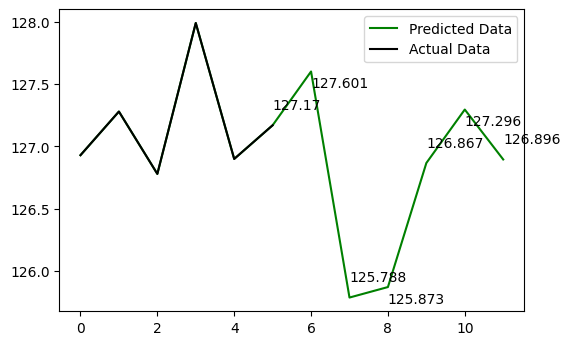

Training ended for PLD
22

Training started for CCI
Epoch 1/7
1/1 - 0s - loss: 0.7211
Epoch 2/7
1/1 - 0s - loss: 0.4314
Epoch 3/7
1/1 - 0s - loss: 0.5047
Epoch 4/7
1/1 - 0s - loss: 0.4410
Epoch 5/7
1/1 - 0s - loss: 0.2966
Epoch 6/7
1/1 - 0s - loss: 0.2283
Epoch 7/7
1/1 - 0s - loss: 0.1314
((1, 8, 1), (1, 1, 1), 'CCI')


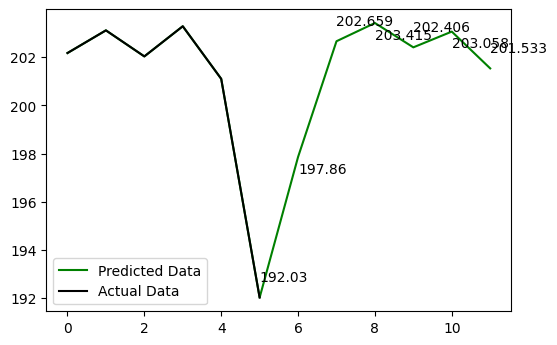

Training ended for CCI
23

Training started for EQIX
Epoch 1/7
1/1 - 0s - loss: 0.1516
Epoch 2/7
1/1 - 0s - loss: 0.1349
Epoch 3/7
1/1 - 0s - loss: 0.2978
Epoch 4/7
1/1 - 0s - loss: 0.3540
Epoch 5/7
1/1 - 0s - loss: 0.1888
Epoch 6/7
1/1 - 0s - loss: 0.3308
Epoch 7/7
1/1 - 0s - loss: 0.4403
((1, 8, 1), (1, 1, 1), 'EQIX')


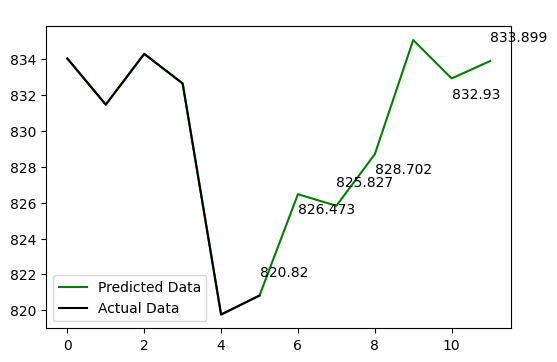

Training ended for EQIX
24

Training started for PSA
Epoch 1/7
1/1 - 0s - loss: 0.4532
Epoch 2/7
1/1 - 0s - loss: 0.3248
Epoch 3/7
1/1 - 0s - loss: 0.3504
Epoch 4/7
1/1 - 0s - loss: 0.1357
Epoch 5/7
1/1 - 0s - loss: 0.1521
Epoch 6/7
1/1 - 0s - loss: 0.0296
Epoch 7/7
1/1 - 0s - loss: 0.0317
((1, 8, 1), (1, 1, 1), 'PSA')


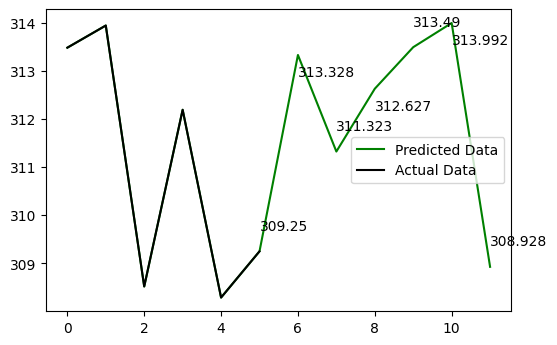

Training ended for PSA
25

Training started for WELL
Epoch 1/7
1/1 - 0s - loss: 0.0420
Epoch 2/7
1/1 - 0s - loss: 0.0642
Epoch 3/7
1/1 - 0s - loss: 0.1233
Epoch 4/7
1/1 - 0s - loss: 0.1633
Epoch 5/7
1/1 - 0s - loss: 0.0902
Epoch 6/7
1/1 - 0s - loss: 0.1641
Epoch 7/7
1/1 - 0s - loss: 0.1857
((1, 8, 1), (1, 1, 1), 'WELL')


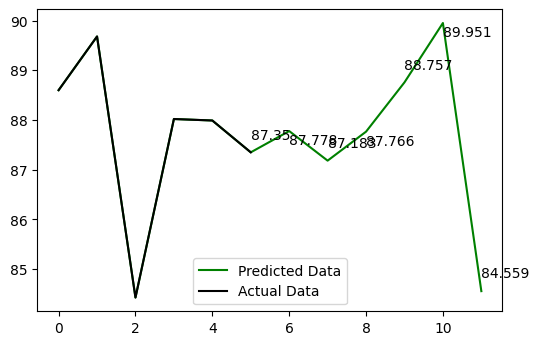

Training ended for WELL
26

Training started for SBAC
Epoch 1/7
1/1 - 0s - loss: 0.0262
Epoch 2/7
1/1 - 0s - loss: 0.0194
Epoch 3/7
1/1 - 0s - loss: 0.0065
Epoch 4/7
1/1 - 0s - loss: 2.3318e-04
Epoch 5/7
1/1 - 0s - loss: 0.0130
Epoch 6/7
1/1 - 0s - loss: 0.0031
Epoch 7/7
1/1 - 0s - loss: 6.3774e-04
((1, 8, 1), (1, 1, 1), 'SBAC')


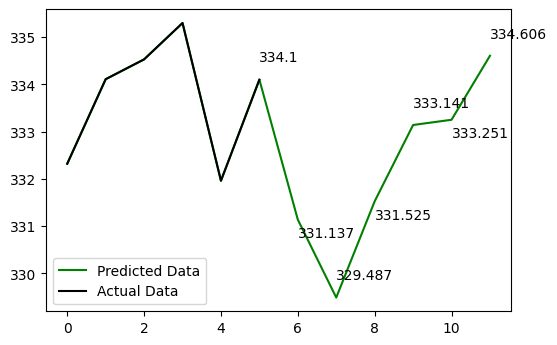

Training ended for SBAC
27

Training started for XOM
Epoch 1/7
1/1 - 0s - loss: 0.2591
Epoch 2/7
1/1 - 0s - loss: 0.5145
Epoch 3/7
1/1 - 0s - loss: 0.3700
Epoch 4/7
1/1 - 0s - loss: 0.3230
Epoch 5/7
1/1 - 0s - loss: 0.4012
Epoch 6/7
1/1 - 0s - loss: 0.2787
Epoch 7/7
1/1 - 0s - loss: 0.3719
((1, 8, 1), (1, 1, 1), 'XOM')


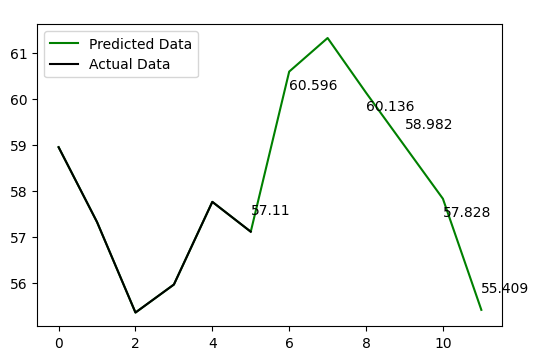

Training ended for XOM
28

Training started for CVX
Epoch 1/7
1/1 - 0s - loss: 0.1889
Epoch 2/7
1/1 - 0s - loss: 0.2123
Epoch 3/7
1/1 - 0s - loss: 0.2194
Epoch 4/7
1/1 - 0s - loss: 0.0239
Epoch 5/7
1/1 - 0s - loss: 0.1429
Epoch 6/7
1/1 - 0s - loss: 0.0193
Epoch 7/7
1/1 - 0s - loss: 0.0044
((1, 8, 1), (1, 1, 1), 'CVX')


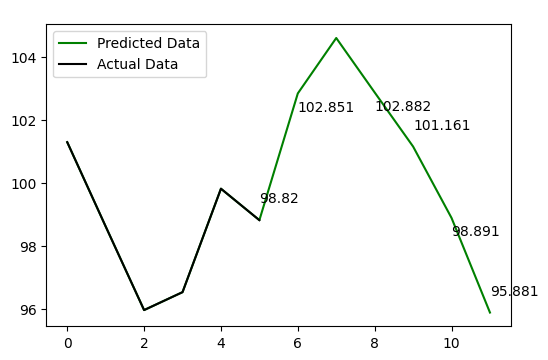

Training ended for CVX
29

Training started for NEP
Epoch 1/7
1/1 - 0s - loss: 5.9486e-04
Epoch 2/7
1/1 - 0s - loss: 0.0049
Epoch 3/7
1/1 - 0s - loss: 0.1664
Epoch 4/7
1/1 - 0s - loss: 0.1095
Epoch 5/7
1/1 - 0s - loss: 0.0032
Epoch 6/7
1/1 - 0s - loss: 0.0199
Epoch 7/7
1/1 - 0s - loss: 0.0070
((1, 8, 1), (1, 1, 1), 'NEP')


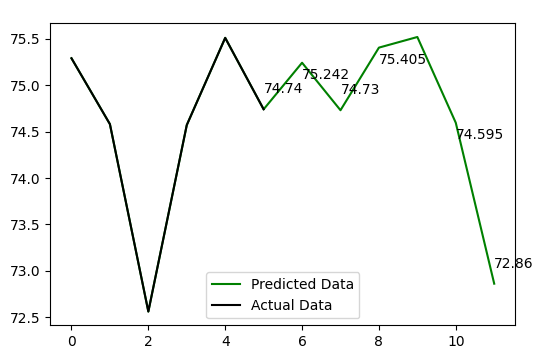

Training ended for NEP
30

Training started for SO
Epoch 1/7
1/1 - 0s - loss: 0.0487
Epoch 2/7
1/1 - 0s - loss: 0.0040
Epoch 3/7
1/1 - 0s - loss: 0.0424
Epoch 4/7
1/1 - 0s - loss: 0.0088
Epoch 5/7
1/1 - 0s - loss: 0.0110
Epoch 6/7
1/1 - 0s - loss: 1.7972e-04
Epoch 7/7
1/1 - 0s - loss: 1.1743e-04
((1, 8, 1), (1, 1, 1), 'SO')


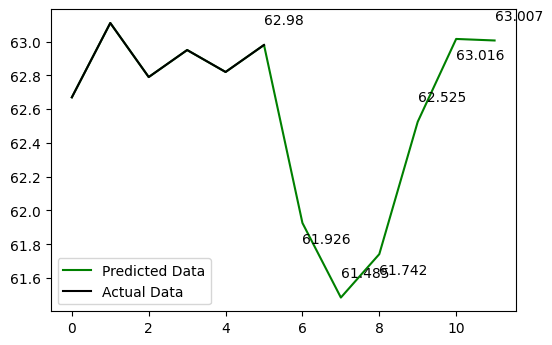

Training ended for SO
31

Training started for D
Epoch 1/7
1/1 - 0s - loss: 6.7674e-05
Epoch 2/7
1/1 - 0s - loss: 0.0016
Epoch 3/7
1/1 - 0s - loss: 1.5323e-06
Epoch 4/7
1/1 - 0s - loss: 1.9908e-04
Epoch 5/7
1/1 - 0s - loss: 0.0028
Epoch 6/7
1/1 - 0s - loss: 0.0181
Epoch 7/7
1/1 - 0s - loss: 1.7648e-04
((1, 8, 1), (1, 1, 1), 'D')


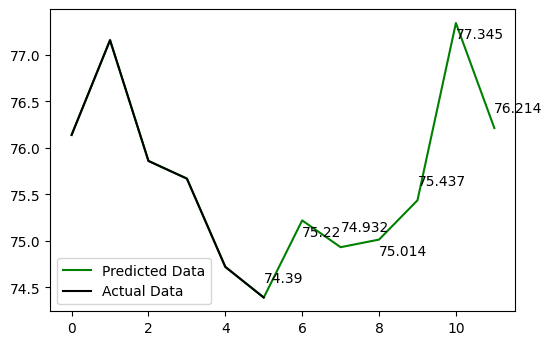

Training ended for D
32

Training started for DUK
Epoch 1/7
1/1 - 0s - loss: 0.0498
Epoch 2/7
1/1 - 0s - loss: 0.0600
Epoch 3/7
1/1 - 0s - loss: 0.0089
Epoch 4/7
1/1 - 0s - loss: 0.0020
Epoch 5/7
1/1 - 0s - loss: 0.0328
Epoch 6/7
1/1 - 0s - loss: 5.3819e-04
Epoch 7/7
1/1 - 0s - loss: 8.6107e-07
((1, 8, 1), (1, 1, 1), 'DUK')


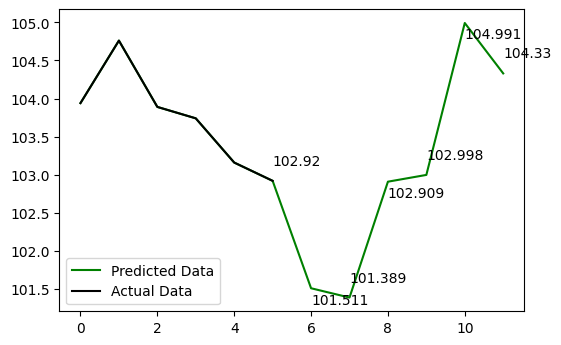

Training ended for DUK
33

Training started for COP
Epoch 1/7
1/1 - 0s - loss: 0.0943
Epoch 2/7
1/1 - 0s - loss: 0.0539
Epoch 3/7
1/1 - 0s - loss: 0.0111
Epoch 4/7
1/1 - 0s - loss: 0.0369
Epoch 5/7
1/1 - 0s - loss: 0.0346
Epoch 6/7
1/1 - 0s - loss: 0.0113
Epoch 7/7
1/1 - 0s - loss: 0.0266
((1, 8, 1), (1, 1, 1), 'COP')


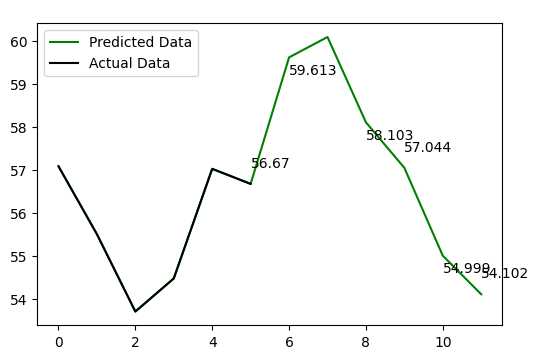

Training ended for COP
34

Training started for AEP
Epoch 1/7
1/1 - 0s - loss: 0.0027
Epoch 2/7
1/1 - 0s - loss: 0.0014
Epoch 3/7
1/1 - 0s - loss: 4.2972e-04
Epoch 4/7
1/1 - 0s - loss: 0.0058
Epoch 5/7
1/1 - 0s - loss: 0.0013
Epoch 6/7
1/1 - 0s - loss: 0.0014
Epoch 7/7
1/1 - 0s - loss: 0.0045
((1, 8, 1), (1, 1, 1), 'AEP')


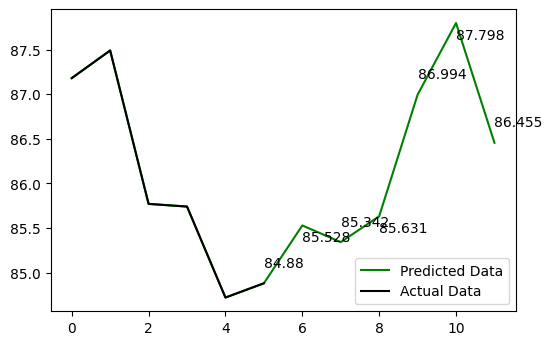

Training ended for AEP
35

Training started for KMI
Epoch 1/7
1/1 - 0s - loss: 0.1577
Epoch 2/7
1/1 - 0s - loss: 0.0640
Epoch 3/7
1/1 - 0s - loss: 0.0534
Epoch 4/7
1/1 - 0s - loss: 0.0186
Epoch 5/7
1/1 - 0s - loss: 0.0315
Epoch 6/7
1/1 - 0s - loss: 0.0436
Epoch 7/7
1/1 - 0s - loss: 0.0383
((1, 8, 1), (1, 1, 1), 'KMI')


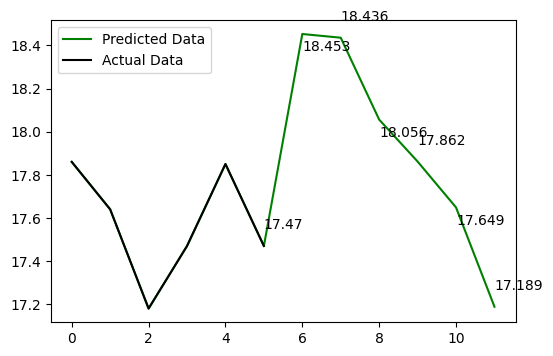

Training ended for KMI
36

Training started for EXC
Epoch 1/7
1/1 - 0s - loss: 0.1064
Epoch 2/7
1/1 - 0s - loss: 0.1527
Epoch 3/7
1/1 - 0s - loss: 0.1007
Epoch 4/7
1/1 - 0s - loss: 0.1521
Epoch 5/7
1/1 - 0s - loss: 0.1183
Epoch 6/7
1/1 - 0s - loss: 0.0654
Epoch 7/7
1/1 - 0s - loss: 0.0454
((1, 8, 1), (1, 1, 1), 'EXC')


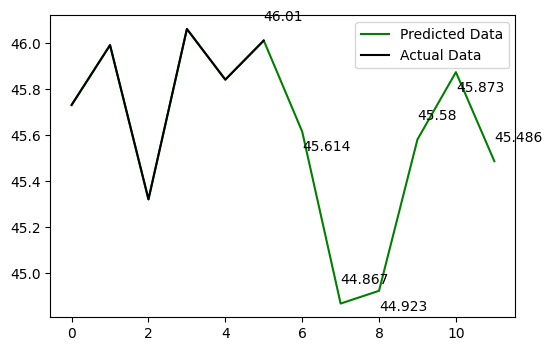

Training ended for EXC
37

Training started for CVS
Epoch 1/7
1/1 - 0s - loss: 0.0140
Epoch 2/7
1/1 - 0s - loss: 0.0037
Epoch 3/7
1/1 - 0s - loss: 4.4152e-04
Epoch 4/7
1/1 - 0s - loss: 0.0038
Epoch 5/7
1/1 - 0s - loss: 0.0102
Epoch 6/7
1/1 - 0s - loss: 0.0077
Epoch 7/7
1/1 - 0s - loss: 0.0144
((1, 8, 1), (1, 1, 1), 'CVS')


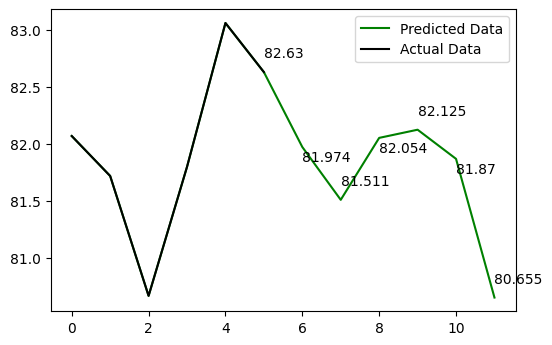

Training ended for CVS
38

Training started for UNH
Epoch 1/7
1/1 - 0s - loss: 0.0657
Epoch 2/7
1/1 - 0s - loss: 0.0039
Epoch 3/7
1/1 - 0s - loss: 0.0170
Epoch 4/7
1/1 - 0s - loss: 0.0433
Epoch 5/7
1/1 - 0s - loss: 0.0195
Epoch 6/7
1/1 - 0s - loss: 3.3112e-04
Epoch 7/7
1/1 - 0s - loss: 0.0373
((1, 8, 1), (1, 1, 1), 'UNH')


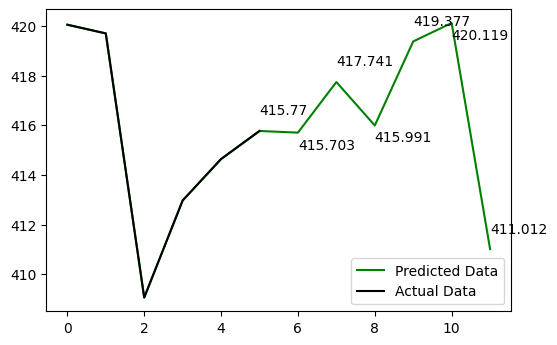

Training ended for UNH
39

Training started for MCK
Epoch 1/7
1/1 - 0s - loss: 0.2288
Epoch 2/7
1/1 - 0s - loss: 0.1106
Epoch 3/7
1/1 - 0s - loss: 0.2260
Epoch 4/7
1/1 - 0s - loss: 0.0977
Epoch 5/7
1/1 - 0s - loss: 0.1505
Epoch 6/7
1/1 - 0s - loss: 0.0684
Epoch 7/7
1/1 - 0s - loss: 0.0402
((1, 8, 1), (1, 1, 1), 'MCK')


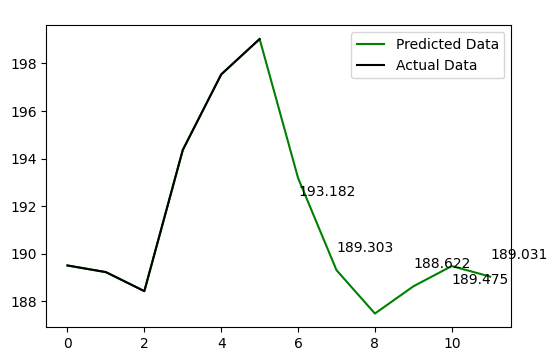

Training ended for MCK
40

Training started for ABC
Epoch 1/7
1/1 - 0s - loss: 0.0395
Epoch 2/7
1/1 - 0s - loss: 0.0474
Epoch 3/7
1/1 - 0s - loss: 0.0330
Epoch 4/7
1/1 - 0s - loss: 0.0040
Epoch 5/7
1/1 - 0s - loss: 0.0149
Epoch 6/7
1/1 - 0s - loss: 0.0046
Epoch 7/7
1/1 - 0s - loss: 0.0023
((1, 8, 1), (1, 1, 1), 'ABC')


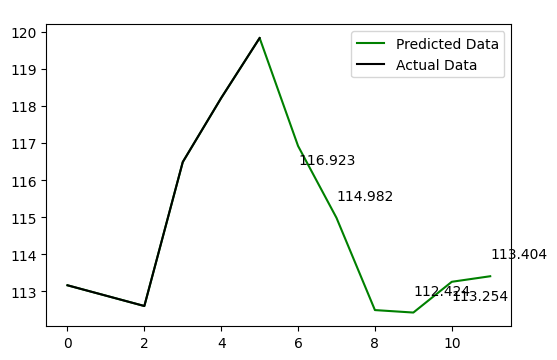

Training ended for ABC
41

Training started for CI
Epoch 1/7
1/1 - 0s - loss: 9.4988e-05
Epoch 2/7
1/1 - 0s - loss: 0.0319
Epoch 3/7
1/1 - 0s - loss: 2.7895e-04
Epoch 4/7
1/1 - 0s - loss: 0.0338
Epoch 5/7
1/1 - 0s - loss: 0.0201
Epoch 6/7
1/1 - 0s - loss: 0.0023
Epoch 7/7
1/1 - 0s - loss: 0.0038
((1, 8, 1), (1, 1, 1), 'CI')


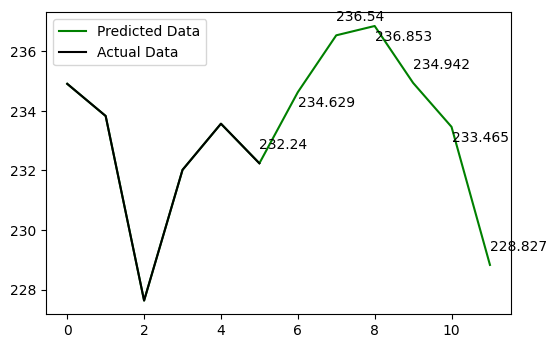

Training ended for CI
42

Training started for CAH
Epoch 1/7
1/1 - 0s - loss: 0.0392
Epoch 2/7
1/1 - 0s - loss: 0.0875
Epoch 3/7
1/1 - 0s - loss: 0.0375
Epoch 4/7
1/1 - 0s - loss: 0.0334
Epoch 5/7
1/1 - 0s - loss: 0.0264
Epoch 6/7
1/1 - 0s - loss: 0.0929
Epoch 7/7
1/1 - 0s - loss: 0.0282
((1, 8, 1), (1, 1, 1), 'CAH')


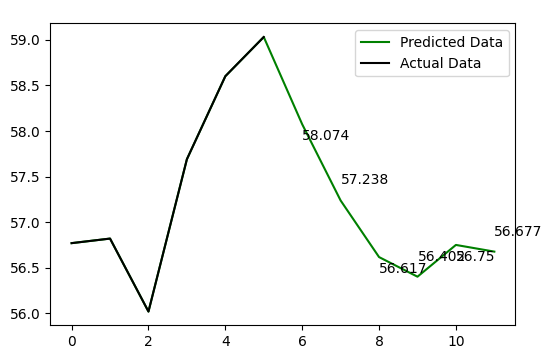

Training ended for CAH
43

Training started for ANTM
Epoch 1/7
1/1 - 0s - loss: 0.0491
Epoch 2/7
1/1 - 0s - loss: 0.1166
Epoch 3/7
1/1 - 0s - loss: 0.0027
Epoch 4/7
1/1 - 0s - loss: 0.0063
Epoch 5/7
1/1 - 0s - loss: 0.0054
Epoch 6/7
1/1 - 0s - loss: 0.0820
Epoch 7/7
1/1 - 0s - loss: 0.0026
((1, 8, 1), (1, 1, 1), 'ANTM')


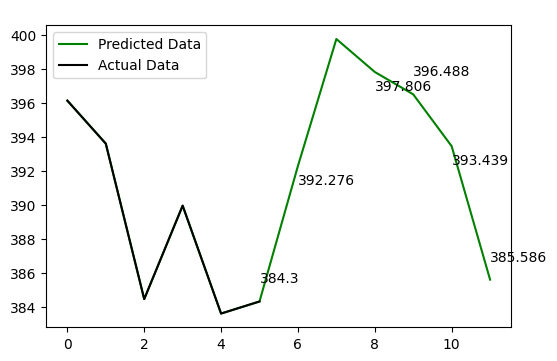

Training ended for ANTM
44

Training started for JNJ
Epoch 1/7
1/1 - 0s - loss: 0.0135
Epoch 2/7
1/1 - 0s - loss: 0.0093
Epoch 3/7
1/1 - 0s - loss: 0.0760
Epoch 4/7
1/1 - 0s - loss: 0.0231
Epoch 5/7
1/1 - 0s - loss: 0.0050
Epoch 6/7
1/1 - 0s - loss: 0.0058
Epoch 7/7
1/1 - 0s - loss: 3.1085e-04
((1, 8, 1), (1, 1, 1), 'JNJ')


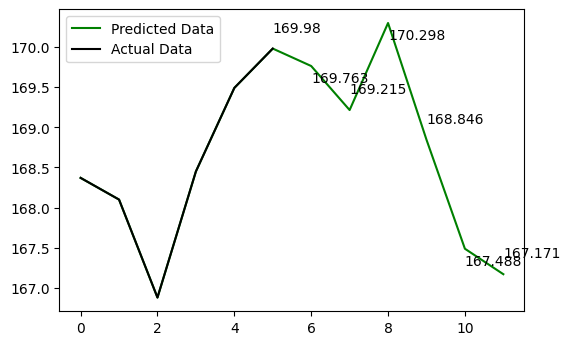

Training ended for JNJ
45

Training started for CNC
Epoch 1/7
1/1 - 0s - loss: 0.2904
Epoch 2/7
1/1 - 0s - loss: 0.1505
Epoch 3/7
1/1 - 0s - loss: 0.1713
Epoch 4/7
1/1 - 0s - loss: 0.1470
Epoch 5/7
1/1 - 0s - loss: 0.0986
Epoch 6/7
1/1 - 0s - loss: 0.0500
Epoch 7/7
1/1 - 0s - loss: 0.1773
((1, 8, 1), (1, 1, 1), 'CNC')


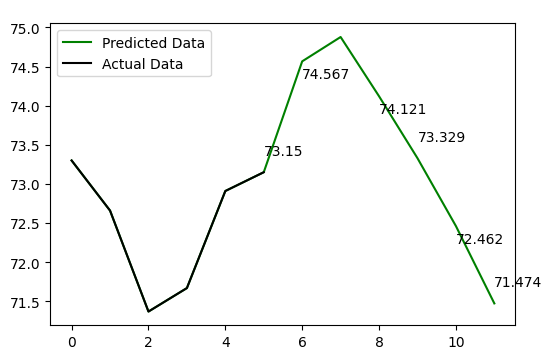

Training ended for CNC
46

Training started for HUM
Epoch 1/7
1/1 - 0s - loss: 0.0981
Epoch 2/7
1/1 - 0s - loss: 0.2501
Epoch 3/7
1/1 - 0s - loss: 0.1942
Epoch 4/7
1/1 - 0s - loss: 0.2028
Epoch 5/7
1/1 - 0s - loss: 0.0494
Epoch 6/7
1/1 - 0s - loss: 0.0029
Epoch 7/7
1/1 - 0s - loss: 0.0318
((1, 8, 1), (1, 1, 1), 'HUM')


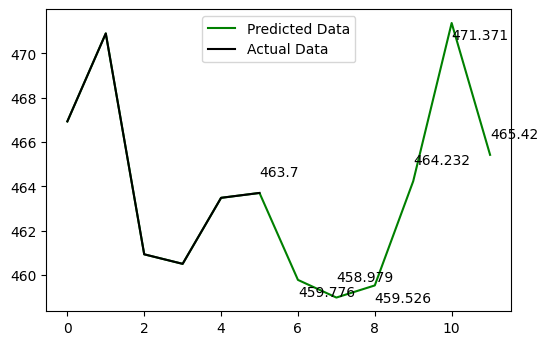

Training ended for HUM
47

Training started for THO
Epoch 1/7
1/1 - 0s - loss: 9.3399e-04
Epoch 2/7
1/1 - 0s - loss: 0.0212
Epoch 3/7
1/1 - 0s - loss: 0.0025
Epoch 4/7
1/1 - 0s - loss: 2.8919e-04
Epoch 5/7
1/1 - 0s - loss: 9.2168e-05
Epoch 6/7
1/1 - 0s - loss: 1.8446e-04
Epoch 7/7
1/1 - 0s - loss: 0.0038
((1, 8, 1), (1, 1, 1), 'THO')


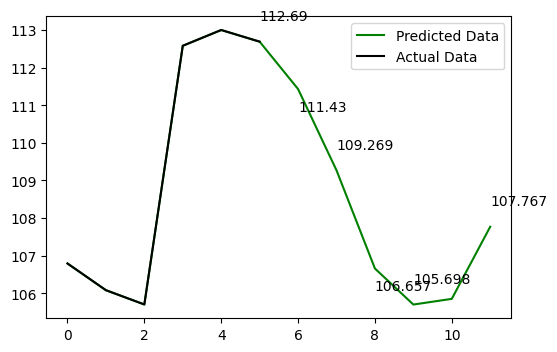

Training ended for THO
48

Training started for PATK
Epoch 1/7
1/1 - 0s - loss: 0.0045
Epoch 2/7
1/1 - 0s - loss: 0.0079
Epoch 3/7
1/1 - 0s - loss: 0.0511
Epoch 4/7
1/1 - 0s - loss: 0.0098
Epoch 5/7
1/1 - 0s - loss: 0.0621
Epoch 6/7
1/1 - 0s - loss: 0.0150
Epoch 7/7
1/1 - 0s - loss: 0.0145
((1, 8, 1), (1, 1, 1), 'PATK')


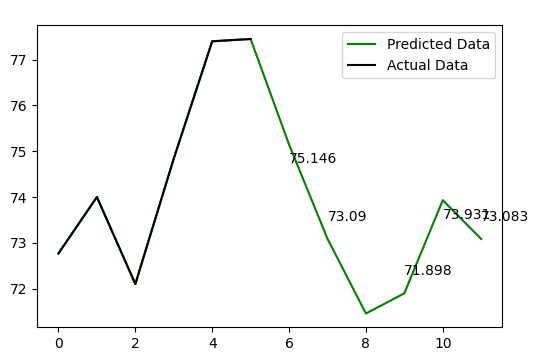

Training ended for PATK
49

Training started for LCII
Epoch 1/7
1/1 - 0s - loss: 0.0066
Epoch 2/7
1/1 - 0s - loss: 0.0054
Epoch 3/7
1/1 - 0s - loss: 0.0091
Epoch 4/7
1/1 - 0s - loss: 0.0114
Epoch 5/7
1/1 - 0s - loss: 0.0021
Epoch 6/7
1/1 - 0s - loss: 0.0065
Epoch 7/7
1/1 - 0s - loss: 0.0181
((1, 8, 1), (1, 1, 1), 'LCII')


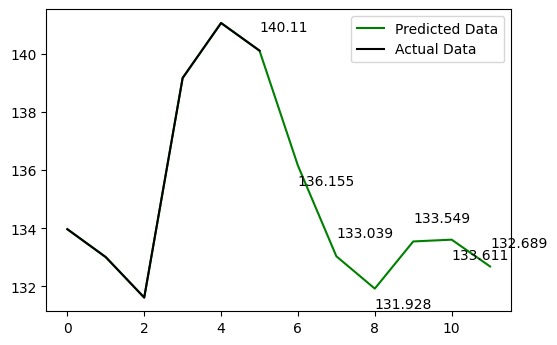

Training ended for LCII
50

Training started for SHW
Epoch 1/7
1/1 - 0s - loss: 0.0063
Epoch 2/7
1/1 - 0s - loss: 7.0535e-04
Epoch 3/7
1/1 - 0s - loss: 0.0051
Epoch 4/7
1/1 - 0s - loss: 4.5508e-08
Epoch 5/7
1/1 - 0s - loss: 0.0133
Epoch 6/7
1/1 - 0s - loss: 2.7105e-04
Epoch 7/7
1/1 - 0s - loss: 0.0015
((1, 8, 1), (1, 1, 1), 'SHW')


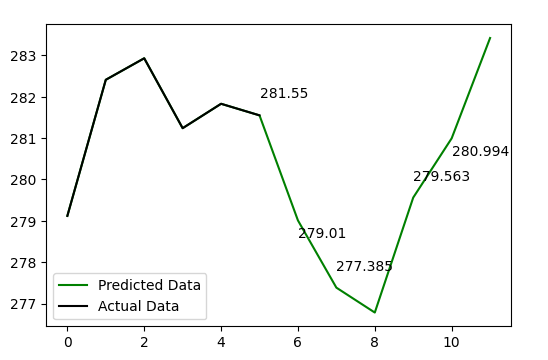

Training ended for SHW
51

Training started for LEA
Epoch 1/7
1/1 - 0s - loss: 0.0140
Epoch 2/7
1/1 - 0s - loss: 0.0235
Epoch 3/7
1/1 - 0s - loss: 0.0145
Epoch 4/7
1/1 - 0s - loss: 0.0616
Epoch 5/7
1/1 - 0s - loss: 0.0266
Epoch 6/7
1/1 - 0s - loss: 0.0461
Epoch 7/7
1/1 - 0s - loss: 0.0189
((1, 8, 1), (1, 1, 1), 'LEA')


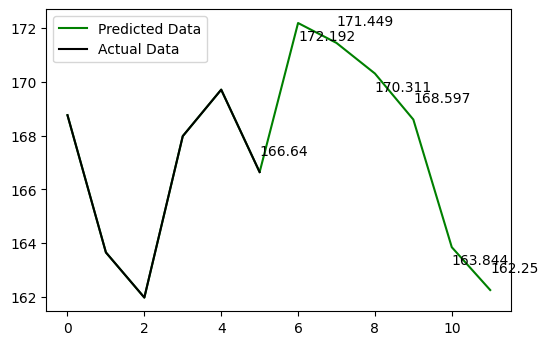

Training ended for LEA
52

Training started for CLX
Epoch 1/7
1/1 - 0s - loss: 0.1134
Epoch 2/7
1/1 - 0s - loss: 0.1662
Epoch 3/7
1/1 - 0s - loss: 0.1112
Epoch 4/7
1/1 - 0s - loss: 0.1038
Epoch 5/7
1/1 - 0s - loss: 0.0569
Epoch 6/7
1/1 - 0s - loss: 0.0117
Epoch 7/7
1/1 - 0s - loss: 0.0637
((1, 8, 1), (1, 1, 1), 'CLX')


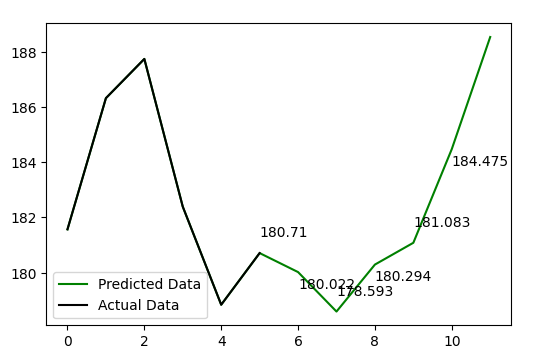

Training ended for CLX
53

Training started for DIS
Epoch 1/7
1/1 - 0s - loss: 0.0505
Epoch 2/7
1/1 - 0s - loss: 0.1437
Epoch 3/7
1/1 - 0s - loss: 0.0840
Epoch 4/7
1/1 - 0s - loss: 0.1043
Epoch 5/7
1/1 - 0s - loss: 0.0855
Epoch 6/7
1/1 - 0s - loss: 0.0110
Epoch 7/7
1/1 - 0s - loss: 0.0145
((1, 8, 1), (1, 1, 1), 'DIS')


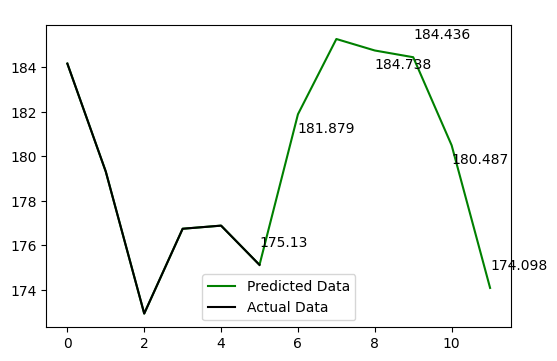

Training ended for DIS
54

Training started for CMCSA
Epoch 1/7
1/1 - 0s - loss: 0.0574
Epoch 2/7
1/1 - 0s - loss: 0.0819
Epoch 3/7
1/1 - 0s - loss: 0.0402
Epoch 4/7
1/1 - 0s - loss: 0.0898
Epoch 5/7
1/1 - 0s - loss: 0.0316
Epoch 6/7
1/1 - 0s - loss: 0.0086
Epoch 7/7
1/1 - 0s - loss: 0.0498
((1, 8, 1), (1, 1, 1), 'CMCSA')


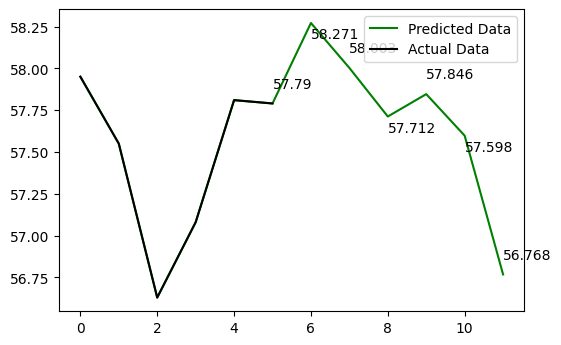

Training ended for CMCSA
55

Training started for NKE
Epoch 1/7
1/1 - 0s - loss: 0.0496
Epoch 2/7
1/1 - 0s - loss: 0.0652
Epoch 3/7
1/1 - 0s - loss: 0.0364
Epoch 4/7
1/1 - 0s - loss: 0.0140
Epoch 5/7
1/1 - 0s - loss: 0.0170
Epoch 6/7
1/1 - 0s - loss: 0.0169
Epoch 7/7
1/1 - 0s - loss: 0.0031
((1, 8, 1), (1, 1, 1), 'NKE')


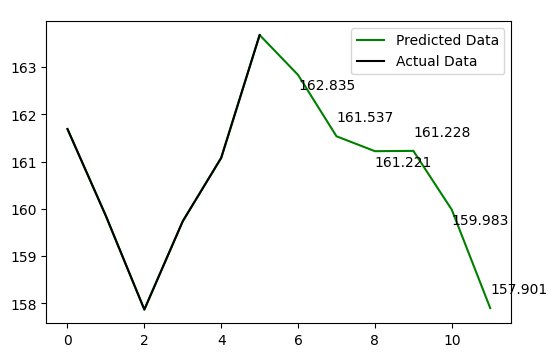

Training ended for NKE
56

Training started for CHTR
Epoch 1/7
1/1 - 0s - loss: 0.0413
Epoch 2/7
1/1 - 0s - loss: 0.0307
Epoch 3/7
1/1 - 0s - loss: 0.0341
Epoch 4/7
1/1 - 0s - loss: 0.0266
Epoch 5/7
1/1 - 0s - loss: 0.0166
Epoch 6/7
1/1 - 0s - loss: 0.0420
Epoch 7/7
1/1 - 0s - loss: 0.0072
((1, 8, 1), (1, 1, 1), 'CHTR')


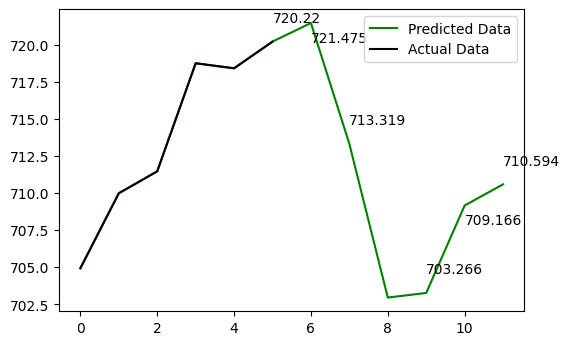

Training ended for CHTR
57

Training started for ATVI
Epoch 1/7
1/1 - 0s - loss: 0.2746
Epoch 2/7
1/1 - 0s - loss: 0.1351
Epoch 3/7
1/1 - 0s - loss: 0.0494
Epoch 4/7
1/1 - 0s - loss: 0.2216
Epoch 5/7
1/1 - 0s - loss: 0.0116
Epoch 6/7
1/1 - 0s - loss: 0.0080
Epoch 7/7
1/1 - 0s - loss: 0.0122
((1, 8, 1), (1, 1, 1), 'ATVI')


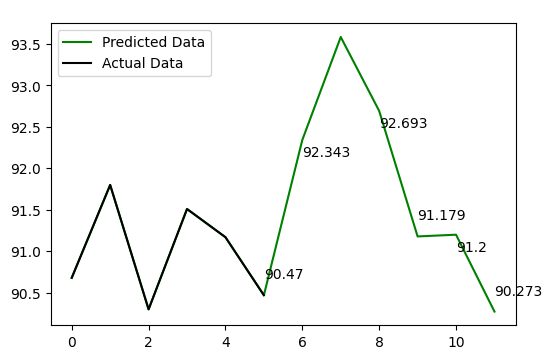

Training ended for ATVI
58

Training started for MAR
Epoch 1/7
1/1 - 0s - loss: 0.0037
Epoch 2/7
1/1 - 0s - loss: 0.0090
Epoch 3/7
1/1 - 0s - loss: 0.0769
Epoch 4/7
1/1 - 0s - loss: 0.0665
Epoch 5/7
1/1 - 0s - loss: 0.0443
Epoch 6/7
1/1 - 0s - loss: 0.1111
Epoch 7/7
1/1 - 0s - loss: 0.0014
((1, 8, 1), (1, 1, 1), 'MAR')


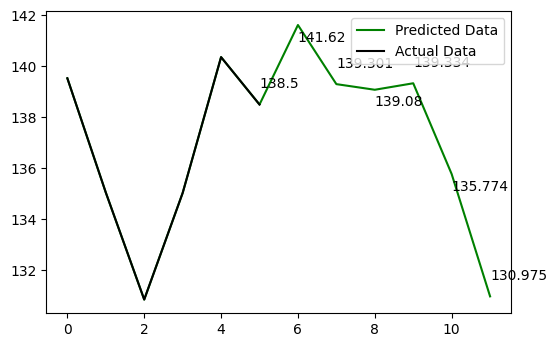

Training ended for MAR
59

Training started for LVS
Epoch 1/7
1/1 - 0s - loss: 0.0026
Epoch 2/7
1/1 - 0s - loss: 0.0027
Epoch 3/7
1/1 - 0s - loss: 0.1019
Epoch 4/7
1/1 - 0s - loss: 0.0162
Epoch 5/7
1/1 - 0s - loss: 0.0377
Epoch 6/7
1/1 - 0s - loss: 4.9234e-04
Epoch 7/7
1/1 - 0s - loss: 0.0020
((1, 8, 1), (1, 1, 1), 'LVS')


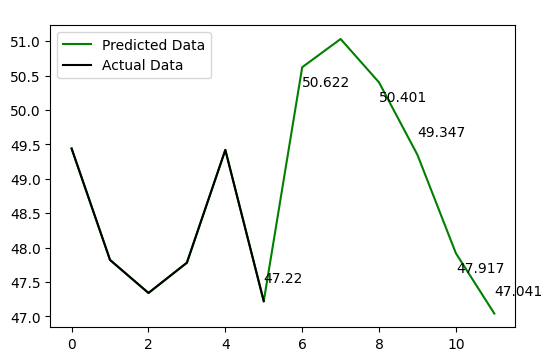

Training ended for LVS
60

Training started for VIAC
Epoch 1/7
1/1 - 0s - loss: 0.1486
Epoch 2/7
1/1 - 0s - loss: 0.1699
Epoch 3/7
1/1 - 0s - loss: 0.2417
Epoch 4/7
1/1 - 0s - loss: 0.1899
Epoch 5/7
1/1 - 0s - loss: 0.0617
Epoch 6/7
1/1 - 0s - loss: 0.1508
Epoch 7/7
1/1 - 0s - loss: 0.1532
((1, 8, 1), (1, 1, 1), 'VIAC')


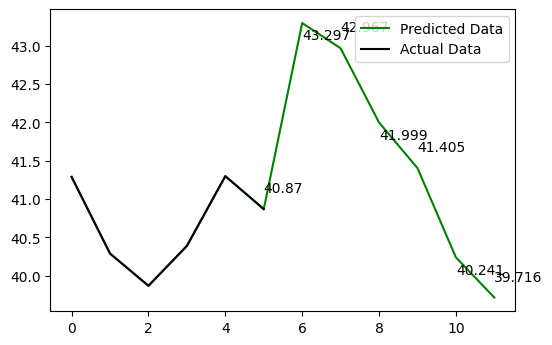

Training ended for VIAC
61

Training started for BTI
Epoch 1/7
1/1 - 0s - loss: 0.2786
Epoch 2/7
1/1 - 0s - loss: 0.2095
Epoch 3/7
1/1 - 0s - loss: 0.1446
Epoch 4/7
1/1 - 0s - loss: 0.1687
Epoch 5/7
1/1 - 0s - loss: 0.0496
Epoch 6/7
1/1 - 0s - loss: 0.1226
Epoch 7/7
1/1 - 0s - loss: 0.1130
((1, 8, 1), (1, 1, 1), 'BTI')


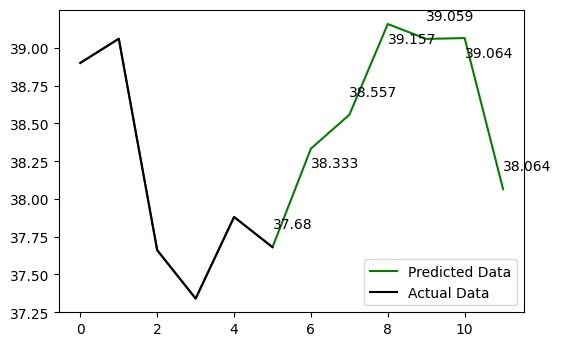

Training ended for BTI
62

Training started for MO
Epoch 1/7
1/1 - 0s - loss: 0.0826
Epoch 2/7
1/1 - 0s - loss: 0.1842
Epoch 3/7
1/1 - 0s - loss: 0.0230
Epoch 4/7
1/1 - 0s - loss: 0.0085
Epoch 5/7
1/1 - 0s - loss: 0.0096
Epoch 6/7
1/1 - 0s - loss: 0.0137
Epoch 7/7
1/1 - 0s - loss: 0.0201
((1, 8, 1), (1, 1, 1), 'MO')


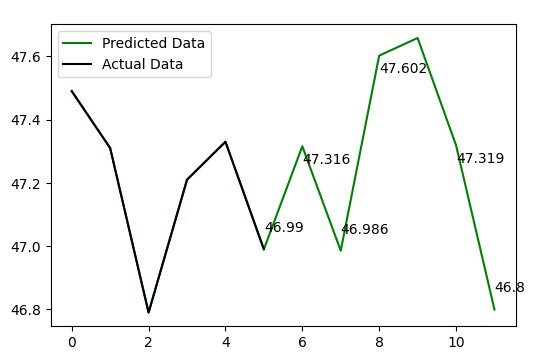

Training ended for MO
63

Training started for EL
Epoch 1/7
1/1 - 0s - loss: 0.0925
Epoch 2/7
1/1 - 0s - loss: 0.0642
Epoch 3/7
1/1 - 0s - loss: 0.0780
Epoch 4/7
1/1 - 0s - loss: 0.1736
Epoch 5/7
1/1 - 0s - loss: 0.0309
Epoch 6/7
1/1 - 0s - loss: 0.0382
Epoch 7/7
1/1 - 0s - loss: 0.0036
((1, 8, 1), (1, 1, 1), 'EL')


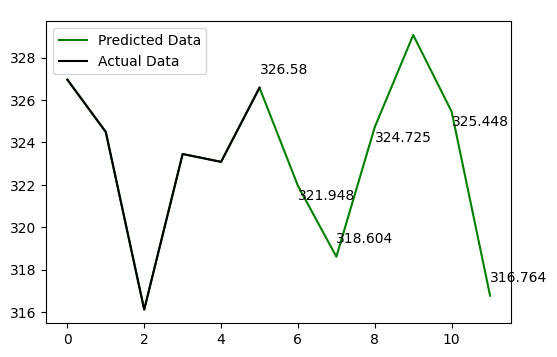

Training ended for EL
64

Training started for BUD
Epoch 1/7
1/1 - 0s - loss: 0.4205
Epoch 2/7
1/1 - 0s - loss: 0.1495
Epoch 3/7
1/1 - 0s - loss: 0.1486
Epoch 4/7
1/1 - 0s - loss: 0.0410
Epoch 5/7
1/1 - 0s - loss: 0.0206
Epoch 6/7
1/1 - 0s - loss: 0.0100
Epoch 7/7
1/1 - 0s - loss: 0.0165
((1, 8, 1), (1, 1, 1), 'BUD')


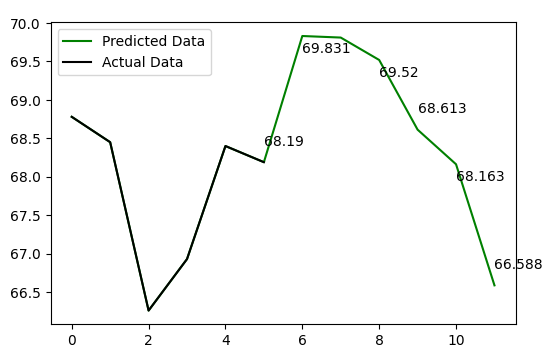

Training ended for BUD
65

Training started for PM
Epoch 1/7
1/1 - 0s - loss: 0.1719
Epoch 2/7
1/1 - 0s - loss: 0.0224
Epoch 3/7
1/1 - 0s - loss: 0.0048
Epoch 4/7
1/1 - 0s - loss: 0.0167
Epoch 5/7
1/1 - 0s - loss: 0.0044
Epoch 6/7
1/1 - 0s - loss: 0.0790
Epoch 7/7
1/1 - 0s - loss: 0.0086
((1, 8, 1), (1, 1, 1), 'PM')


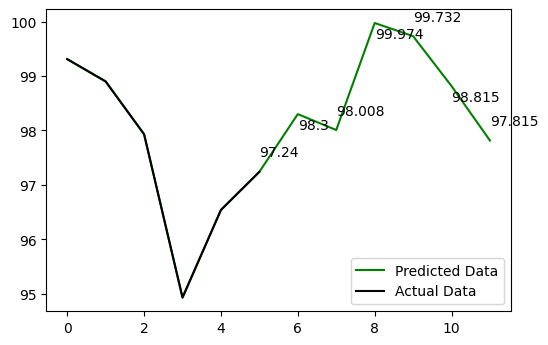

Training ended for PM
66

Training started for PEP
Epoch 1/7
1/1 - 0s - loss: 0.3347
Epoch 2/7
1/1 - 0s - loss: 0.3826
Epoch 3/7
1/1 - 0s - loss: 0.2640
Epoch 4/7
1/1 - 0s - loss: 0.0930
Epoch 5/7
1/1 - 0s - loss: 0.0429
Epoch 6/7
1/1 - 0s - loss: 5.4815e-04
Epoch 7/7
1/1 - 0s - loss: 0.0387
((1, 8, 1), (1, 1, 1), 'PEP')


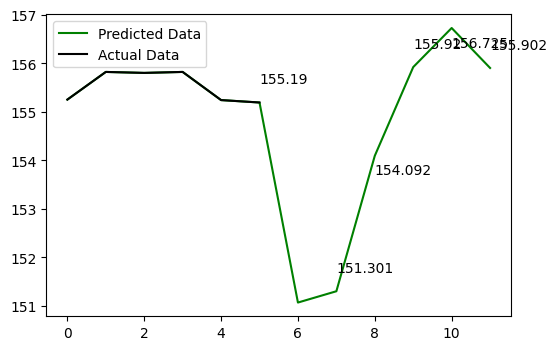

Training ended for PEP
67

Training started for KO
Epoch 1/7
1/1 - 0s - loss: 0.0015
Epoch 2/7
1/1 - 0s - loss: 0.0119
Epoch 3/7
1/1 - 0s - loss: 0.1051
Epoch 4/7
1/1 - 0s - loss: 0.0390
Epoch 5/7
1/1 - 0s - loss: 0.0407
Epoch 6/7
1/1 - 0s - loss: 0.0569
Epoch 7/7
1/1 - 0s - loss: 0.0769
((1, 8, 1), (1, 1, 1), 'KO')


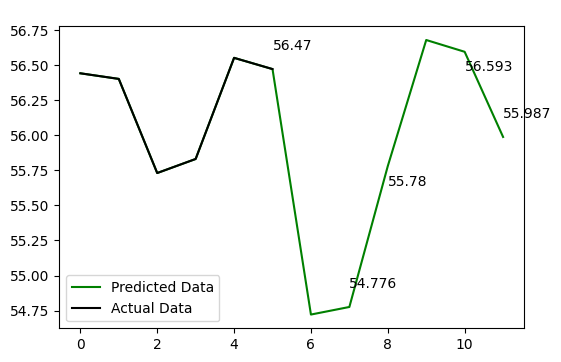

Training ended for KO
68

Training started for PG
Epoch 1/7
1/1 - 0s - loss: 0.0368
Epoch 2/7
1/1 - 0s - loss: 0.2027
Epoch 3/7
1/1 - 0s - loss: 0.1307
Epoch 4/7
1/1 - 0s - loss: 0.1367
Epoch 5/7
1/1 - 0s - loss: 0.1121
Epoch 6/7
1/1 - 0s - loss: 0.0303
Epoch 7/7
1/1 - 0s - loss: 0.0146
((1, 8, 1), (1, 1, 1), 'PG')


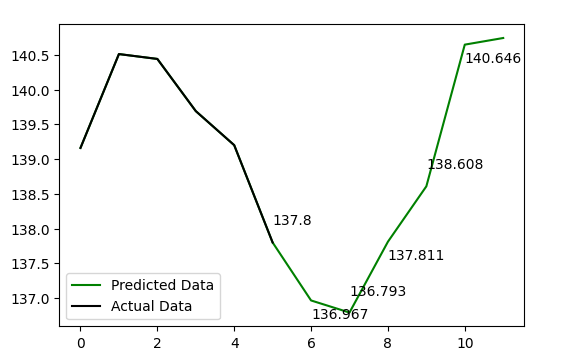

Training ended for PG
69



In [16]:
cou= 1 
for c in pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0]:
  print("Training started for "+c)
  c = c.strip()
  sdata =data[f'{c}']['Close'].dropna().values.reshape(-1,1) 
  x_train=[]
  y_train=[]
  
  param[f'{c}']['mean'] = sdata.mean()
  param[f'{c}']['std'] = sdata.std() 
  sdata = norm(sdata ,c )

  x_train.append(sdata[:-1 ] )
  y_train.append(sdata[-1:])

  x_train,y_train = np.array(x_train) , np.array(y_train)
  x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  train_model(x_train,y_train)

  print((x_train.shape,y_train.shape,c))
  pr = scaled(model.predict(x_train),c)
  d = 1 
  sdata = np.vstack((sdata, model.predict(sdata[d:].reshape((1,8,1)))))
  d+=1

  sdata = np.vstack((sdata,model.predict(sdata[d:].reshape((1,8,1)))))
  d+=1
 
  sdata = np.vstack((sdata,model.predict(sdata[d:].reshape((1,8,1)))))
  d+=1

  sdata = np.vstack((sdata,model.predict(sdata[d:].reshape((1,8,1)))))
  d+=1

  sdata = np.vstack((sdata,model.predict(sdata[d:].reshape((1,8,1)))))
  d+=1

  sdata = np.vstack((sdata,model.predict(sdata[d:].reshape((1,8,1)))))
  sdata = scaled(sdata,c)

  param[f'{c}']['pred'] = pr
  a[f'{c}']['pred'] = pr
  param[f'{c}']['real'] = data[f'{c}']['Close'][-1:]
  a[f'{c}']['real'] = data[f'{c}']['Close'][-1:]
  param[f'{c}']['pred_next'] = sdata[9] 
  a[f'{c}']['pred_next'] = sdata[9]
  a[f'{c}']['pred_next2'] = sdata[10]
  a[f'{c}']['pred_next3'] = sdata[11]
  a[f'{c}']['pred_next4'] = sdata[12]
  a[f'{c}']['pred_next5'] = sdata[13]
  a[f'{c}']['pred_next6'] = sdata[14]
  save_plot(sdata,c,name=f'{c}')
  print("Training ended for "+c)
  print(cou)
  cou+=1
  print()
  param = param.dropna(axis=1,)
  a.to_excel(f'/content/drive/MyDrive/SentStock/preds_{end.strftime("%m_%d_%Y")}.xlsx')
  param.to_csv('/content/drive/MyDrive/SentStock/param.csv',index=False)

In [17]:
sdata.shape

(15, 1)

In [20]:
model.save('/content/drive/MyDrive/SentStock/stock_lstm.keras')